Dataset Preview:
    message_length  response_time  case_type
0             106             29  technical
1             220             18    general
2             356             44    general
3             341              8    general
4             294             31    billing

Model Evaluation:
               precision    recall  f1-score   support

     billing       1.00      1.00      1.00        11
     general       1.00      1.00      1.00         5
   technical       1.00      1.00      1.00         4

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



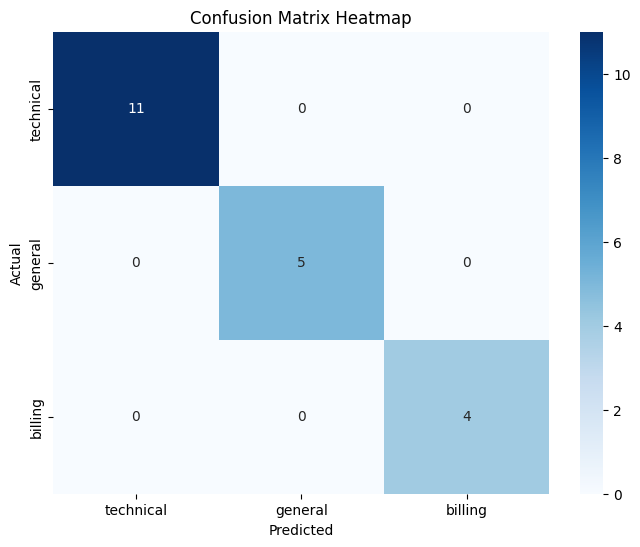


Sample Case Predictions:
'Why was I charged twice on my card?' => billing
'I'm unable to install the software on my computer.' => technical
'What is your customer service email address?' => general


In [ ]:
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv("/content/support_cases.csv")

# Step 2: Show what's inside
print("Dataset Preview:\n", df.head())

# Step 3: Create fake message text based on case_type
def generate_fake_message(case_type):
    if case_type == "billing":
        return random.choice([
            "I was overcharged this month.",
            "Need help understanding my invoice.",
            "I want a refund for the last transaction.",
            "Why is my card being declined?",
            "Billing error in the receipt."
        ])
    elif case_type == "technical":
        return random.choice([
            "App keeps crashing after login.",
            "Can't reset my password.",
            "Having trouble connecting to Wi-Fi.",
            "The software update failed.",
            "Getting error code 404 while browsing."
        ])
    else:  # general
        return random.choice([
            "What are your support hours?",
            "How do I update my contact details?",
            "Can I cancel my subscription?",
            "Need help navigating the dashboard.",
            "How do I change my settings?"
        ])

# Add the fake messages to the dataset
df['case_description'] = df['case_type'].apply(generate_fake_message)

# Step 4: Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    df['case_description'],
    df['case_type'],
    test_size=0.2,
    random_state=42
)

# Step 5: Create a pipeline for TF-IDF + Naive Bayes Classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=1000)),
    ('classifier', MultinomialNB())
])

# Step 6: Train the model
pipeline.fit(X_train, y_train)

# Step 7: Evaluate the model
y_pred = pipeline.predict(X_test)
print("\nModel Evaluation:\n", classification_report(y_test, y_pred))

# Step 8: Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=df['case_type'].unique(), yticklabels=df['case_type'].unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Step 9: Predict on some example cases
sample_cases = [
    "Why was I charged twice on my card?",
    "I'm unable to install the software on my computer.",
    "What is your customer service email address?"
]
predictions = pipeline.predict(sample_cases)

print("\nSample Case Predictions:")
for msg, pred in zip(sample_cases, predictions):
    print(f"'{msg}' => {pred}")

# Step 10: Take user input and predict the case type
while True:
    user_input = input("\nEnter a support message (or type 'exit' to quit): ")
    if user_input.lower() == "exit":
        print("Thank you! Exiting the program.")
        break
    result = pipeline.predict([user_input])[0]
    print(f"The case type is likely: {result}")
